# Diabetes Prediction using Logistic Regression

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from utils import *
import copy
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Loading Dataset
data = pd.read_csv("/kaggle/input/diabetes-prediction/diabetes.csv")

In [4]:
# Visualise the data
data

,Family_History,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Family_History            768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check for the missing values in the dataset
data.isnull().sum()

Family_History              0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Counting values in each class
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Spliting dataset into input and output (i.e x and y)
X = data.iloc[:,:8]
y = data.iloc[:,8]

In [9]:
# visualise x and y
print("x : ",X)
print()
print("y : ",y)

x :       Family_History  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                 6      148             72             35        0  33.6   
1                 1       85             66             29        0  26.6   
2                 8      183             64              0        0  23.3   
3                 1       89             66             23       94  28.1   
4                 0      137             40             35      168  43.1   
..              ...      ...            ...            ...      ...   ...   
763              10      101             76             48      180  32.9   
764               2      122             70             27        0  36.8   
765               5      121             72             23      112  26.2   
766               1      126             60              0        0  30.1   
767               1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   5

In [10]:
# Scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
# Spliting x and y into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


In [12]:
# visualise data
print("First five elements in X_train are:\n", x_train[:5])
print("Type of X_train:",type(x_train))
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))


First five elements in X_train are:
 [[-0.54791859 -1.12339636 -0.2122435  -1.28821221 -0.69289057  0.96552824
   1.38358794 -0.53102292]
 [-1.14185152 -0.81042491 -0.26394125  1.15818217  0.2188135   1.60012447
  -0.319759   -0.95646168]
 [-0.54791859 -0.46615631 -0.67752325  0.40544544  0.73978725 -0.37981576
  -0.13855188 -0.95646168]
 [-0.25095213  0.00330087 -0.88431425 -1.28821221 -0.69289057  0.50861896
  -1.04156736 -0.70119842]
 [ 1.53084665  1.38037527  0.97680475 -1.28821221 -0.69289057 -0.20212881
  -0.51304659  1.34090765]]
Type of X_train: <class 'numpy.ndarray'>
First five elements in y_train are:
 104    0
682    0
733    0
678    1
355    1
Name: Outcome, dtype: int64
Type of y_train: <class 'pandas.core.series.Series'>


In [13]:
# Check the dimensions of data
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (576, 8)
The shape of y_train is: (576,)
We have m = 576 training examples


In [14]:
# convert pandas series to numpy ndarray
y_train = y_train.to_numpy()

In [15]:
y_train

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

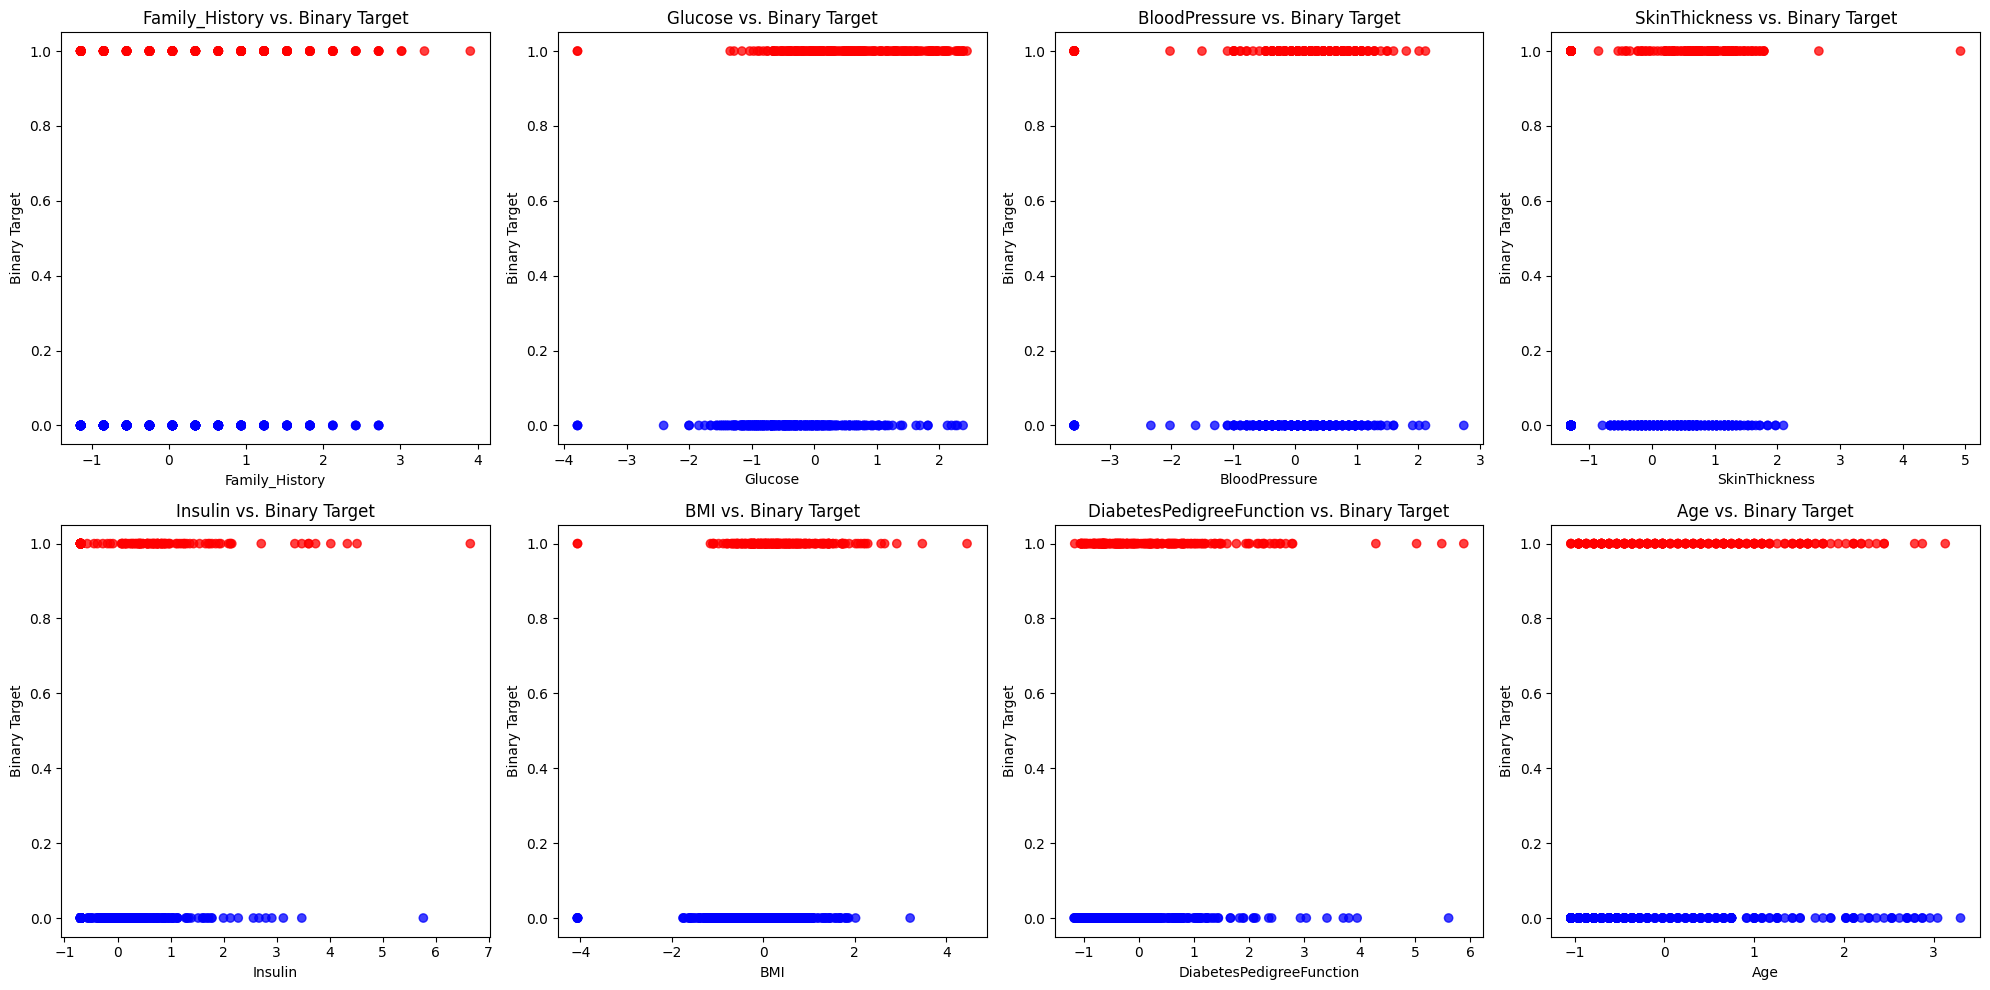

In [16]:
# Visualize data
# plotting each features against the output variable y

y_train = y_train.reshape(-1)

# list of feature names
features = ["Family_History", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",\
            "DiabetesPedigreeFunction", "Age"]
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each feature against the binary target
for k in range(8):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x_train[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75)
    axes[i, j].set_title(f'{features[k]} vs. Binary Target')
    axes[i, j].set_xlabel(features[k])
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

## Model Training

In [17]:
# Sigmoid Function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [18]:
# testing sigmoid function
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid([ -2, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid(0) = 0.5
sigmoid([ -2, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


In [19]:
# Cost function for logistic regression
def compute_cost(X, y, w, b):
    m, n = X.shape

    cost = 0
    
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    
    total_cost = cost/m
    return total_cost

In [20]:
# Compute and display cost with w initialized to zeroes
m, n = x_train.shape

initial_w = np.zeros(n)
initial_b = 0.
print(initial_w.shape)
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

(8,)
Cost at initial w (zeros): 0.693


In [21]:
# Gradient for logistic regression
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m

    return dj_db, dj_dw

In [22]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.14930555555555555
dj_dw at initial w (zeros):[-0.1109368124059824, -0.22342302257707272, -0.00808408418171113, -0.03497257297821086, -0.055101042613061674, -0.12894900992736158, -0.08238140246409842, -0.11451631951857909]


In [23]:
# Learning parameters using batgradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [24]:
w_init = 0.01 * (np.random.rand(8).reshape(-1,1) - 0.5)  
b_init = -8
alpha = 0.015
num_iters = 5000

# Call gradient descent
w_final, b_final, J_history, w_history = gradient_descent(
    x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)

Iteration    0: Cost     2.80   


/tmp/ipykernel_79/4063816256.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


Iteration  500: Cost     1.29   
Iteration 1000: Cost     0.81   
Iteration 1500: Cost     0.63   
Iteration 2000: Cost     0.54   
Iteration 2500: Cost     0.50   
Iteration 3000: Cost     0.48   
Iteration 3500: Cost     0.47   
Iteration 4000: Cost     0.47   
Iteration 4500: Cost     0.47   
Iteration 4999: Cost     0.47   


In [25]:
# Evaluating logistic regression
def predict(X, w, b): 
    
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 

        # Loop over each feature
        for j in range(n): 
            z_wb += 0
            
        # Add bias term     
        z_wb += b

        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    return p

In [26]:
#compute the accuracy on the testing set
p = predict(x_test, w_final, b_final)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 72.916667


## Training the model using scikit learn 

In [30]:
model = LogisticRegression()

model.fit(x_train, y_train)

m = x_train.shape[0]
predicted = np.zeros(m)

predicted = model.predict(x_train)

print(model.coef_)
print(model.intercept_)

[[ 0.45649064  1.14817261 -0.34266692  0.09124696 -0.19991717  0.68585056
   0.27714294  0.16825658]]
[-0.85401079]


In [28]:
# accuracy on the testing data
accuracy = accuracy_score(y_test, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 73.4375


In [31]:
# accuracy on training data
accuracy = accuracy_score(y_train, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 79.6875
